## <b>Project Description:</b><br>
Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced. Some forms of attrition are unavoidable, like if an employee is retiring or is moving to another city. Companies with high workforce attrition rates often face the risk of abusing internal resources.

## <b>Purpose:</b><br>
Assess which factors affect the most employee attrition and try to identify measures to reduce this rate.
Build a predictive machine learning model based on employee factors to predict whether that employee is likely to attrition or not.

## Data Preprocessing

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from warnings import filterwarnings

filterwarnings("ignore")

Import Dataset

In [2]:
df = pd.read_csv('HR_DS.csv')

Data Discovery

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Conclusions:**
- Target is binary.
- 35 columns and 1470 rows -> 34 features, 1 target to investigate, and 1470 different employee's information.
- Feature type: 8 categorical and 26 numerical.

In [4]:
# select only categorical
df_cat = df.select_dtypes('object')

In [5]:
# select only numerical
df_num = df.select_dtypes('int64')

In [6]:
df_cat.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


- Over18: All values are Y

In [7]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


- EmployeeCount: all values are 1.0
- StandardHours: all values are 80.0
- EmployeeNumber: is the id of the employee. It does not affect the results of our analysis.

We're going to remove the 4 identified columns:

In [8]:
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [9]:
df_copy = df.copy()

In [10]:
# using label encoder to the categorical features that have only two distinct values
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [11]:
# create dummie variables from the remaining categorical features
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])

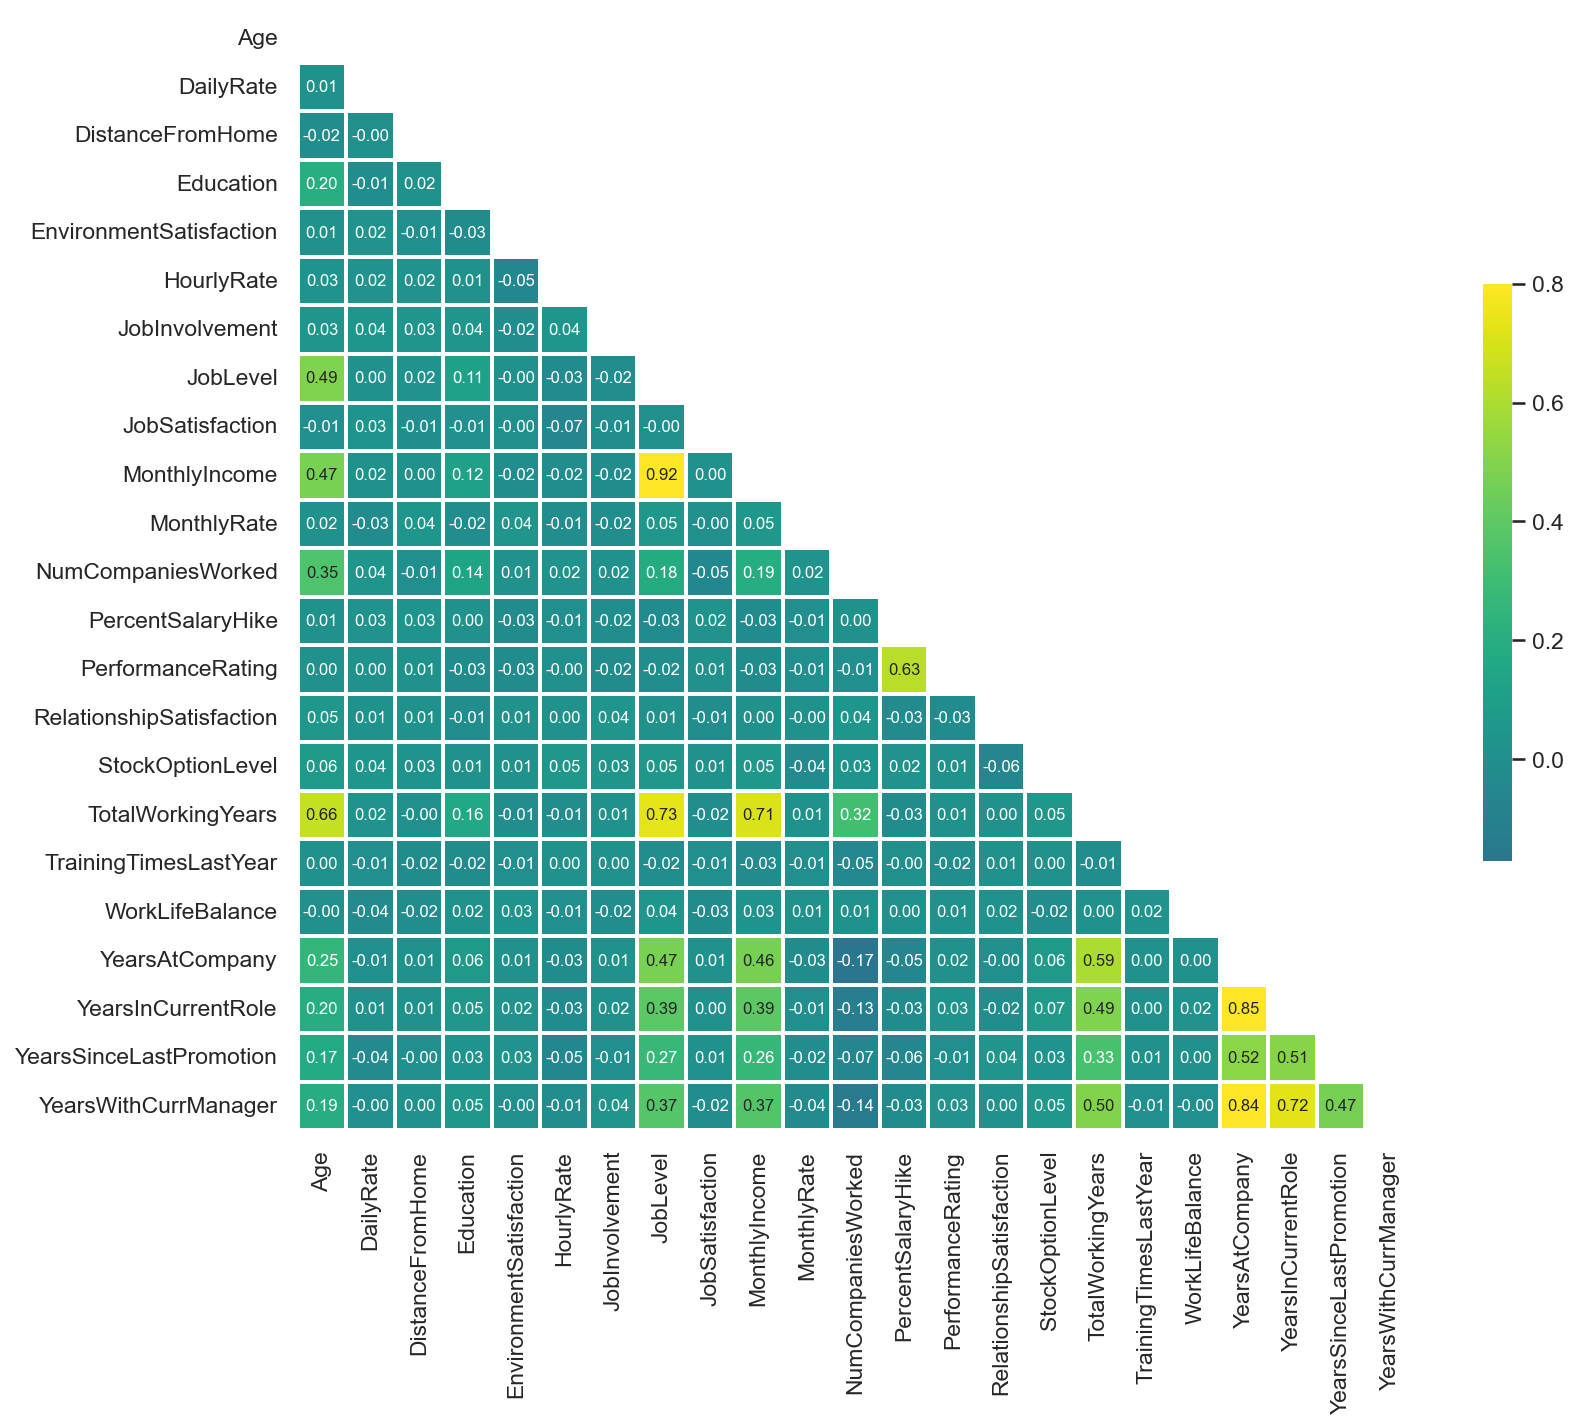

In [12]:
corr = df.select_dtypes('int64').corr(method='spearman')

sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 150)
heatmap = sns.heatmap(corr, mask = mask, cmap= "viridis", vmax=.8, center=0,
             square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot = True, annot_kws={'size': 8},fmt = ".2f")

**There are high correlation between some features:**<br>
- 'MonthlyIncome' and 'JobLevel'
- 'YearsAtCompany' , 'YearsInCurrentRole', 'YearsWithCurrManager'

Because of the high correlation, we are going to drop the following features: 'MonthlyIncome' ,'YearsInCurrentRole', 'YearsWithCurrManager'

In [13]:
df_model = df.copy()
df_model = df_model.drop(['MonthlyIncome' ,'YearsInCurrentRole', 'YearsWithCurrManager'],axis=1)

## **PREDICTIVE MODEL**

In [14]:
cat = df_model.select_dtypes('object')

In [15]:
# Encoding all categorical features
for col in cat.columns:
   n = 2
   for i in cat[col].unique():
      df_model[col] = df_model[col].replace(i,n)
      n += 1

In [16]:
# normalizing the dataframe
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
norm = scaler.fit_transform(df_model)
norm_df = pd.DataFrame(norm,columns=df_model.columns)

In [17]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

## Problem: Imbalanced Data Distribution<br>
The dataset that we have is Imbalanced, having more samples without attrition than those with attrition. Thus giving us a problem that ofter occurs in Data Science called Imbalanced Data Distribuiton.
Having imbalanced data distribution in our dataset can potencially make our model more prone to the case when minority class has negligible or very lesser recall.
In order to counter this problem, there are multiple methods to try and avoid the imbalanced data distribution problem. One of those methods is a oversampling method called SMOTE.

## SMOTE – Oversampling<br>
SMOTE stand for **S**ynthetic **M**inority **O**versampling **T**echnique. This method is one of the most commonly used oversampling methods to solve the imbalance problem. The objective is to balance the classes by randomly increasing minority class examples by replicating them. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class.

## Evaluation Criteria<br>
We decided to try three predictive algorithms: **Logistic Regression**,**Random Forest**, **Gradient Boosting**, **Support Vector Machine**, and **k-Nearest Neighbors**.
In order to evaluate each of the models, we decided to use the metrics accuracy, precision, f1 score, and recall score.

1. **`Accuracy Score:`**
- **Interpretation:** The accuracy score represents the proportion of correctly classified instances among the total instances.
- **Conclusion:** A higher accuracy score indicates a better overall performance, but it might not be sufficient for imbalanced datasets. It doesn't distinguish between different types of errors.

2. **`Precision Score:`**
- **Interpretation:** Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of positive predictions.
- **Conclusion:** A higher precision score indicates a lower rate of false positives. It's valuable when the cost of false positives is high.

3. **`F1 Score:`**
- **Interpretation:** The F1 score is the harmonic mean of precision and recall. It balances precision and recall, providing a single metric that considers both false positives and false negatives.
- **Conclusion:** A higher F1 score indicates a balance between precision and recall. It is useful when there is an uneven class distribution.

4. **`Recall Score:`**
- **Interpretation:** Recall is the ratio of true positive predictions to the total actual positives. It measures the ability to capture all positive instances.
- **Conclusion:** A higher recall score indicates a lower rate of false negatives. It's important when missing positive instances is costly.

In [18]:
# split the dataframe into train and test samples
x_train, x_test, y_train, y_test = train_test_split(X ,Y ,test_size = 0.2 , random_state = 0)

In [19]:
# applying SMOTE
smote = SMOTE(random_state=0)
smote_train, smote_target = smote.fit_resample(x_train,y_train)

## 1. Logistic Regression

In [20]:
log_reg = LogisticRegression(C=1000, max_iter=10000)
log_reg.fit(smote_train, smote_target)
y_pred = log_reg.predict(x_test)

# calculate metrics
f1 = round(metrics.f1_score(y_test, y_pred)*100,2)
recall = round(metrics.recall_score(y_test, y_pred)*100,2)
precision = round(metrics.precision_score(y_test, y_pred)*100,2)
accuracy = round(metrics.accuracy_score(y_test, y_pred)*100,2)
print(f"ACCURACY: {accuracy}% | PRECISION: {precision}% | F1 SCORE: {f1}% | RECALL SCORE: {recall}%")

ACCURACY: 75.85% | PRECISION: 93.94% | F1 SCORE: 83.97% | RECALL SCORE: 75.92%


## 2. Random Forrest

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)

y_pred = rfc.predict(x_test)

# calculate metrics
f1 = round(metrics.f1_score(y_test, y_pred)*100,2)
recall = round(metrics.recall_score(y_test, y_pred)*100,2)
precision = round(metrics.precision_score(y_test, y_pred)*100,2)
accuracy = round(metrics.accuracy_score(y_test, y_pred)*100,2)
print(f"ACCURACY: {accuracy}% | PRECISION: {precision}% | F1 SCORE: {f1}% | RECALL SCORE: {recall}%")

ACCURACY: 97.96% | PRECISION: 97.7% | F1 SCORE: 98.84% | RECALL SCORE: 100.0%


## 3. Gradient Boosting

In [22]:
seed = 0

gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
    }

gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
y_pred = gb.predict(x_test)

# calculate metrics
f1 = round(metrics.f1_score(y_test, y_pred)*100,2)
recall = round(metrics.recall_score(y_test, y_pred)*100,2)
precision = round(metrics.precision_score(y_test, y_pred)*100,2)
accuracy = round(metrics.accuracy_score(y_test, y_pred)*100,2)
print(f"ACCURACY: {accuracy}% | PRECISION: {precision}% | F1 SCORE: {f1}% | RECALL SCORE: {recall}%")

ACCURACY: 97.62% | PRECISION: 97.69% | F1 SCORE: 98.64% | RECALL SCORE: 99.61%


## 4. Support Vector Machine

In [23]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)

# calculate metrics
f1 = round(metrics.f1_score(y_test, y_pred)*100,2)
recall = round(metrics.recall_score(y_test, y_pred)*100,2)
precision = round(metrics.precision_score(y_test, y_pred)*100,2)
accuracy = round(metrics.accuracy_score(y_test, y_pred)*100,2)
print(f"ACCURACY: {accuracy}% | PRECISION: {precision}% | F1 SCORE: {f1}% | RECALL SCORE: {recall}%")

ACCURACY: 88.1% | PRECISION: 88.46% | F1 SCORE: 93.53% | RECALL SCORE: 99.22%


## 5. k-Nearest Neighbors

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

# calculate metrics
f1 = round(metrics.f1_score(y_test, y_pred)*100,2)
recall = round(metrics.recall_score(y_test, y_pred)*100,2)
precision = round(metrics.precision_score(y_test, y_pred)*100,2)
accuracy = round(metrics.accuracy_score(y_test, y_pred)*100,2)
print(f"ACCURACY: {accuracy}% | PRECISION: {precision}% | F1 SCORE: {f1}% | RECALL SCORE: {recall}%")

ACCURACY: 83.67% | PRECISION: 87.64% | F1 SCORE: 90.94% | RECALL SCORE: 94.51%


The following table gives us the comparing values of the evaluation metrics for the five considered algorithms.

| Algorithm                | Accuracy  | Precision | F1 Score    | Recall  |
|--------------------------|-----------|-----------|-----------|-----------|
| Logistic Regression   | 75.85%      | 93.94%       | 83.97%      | 75.92%      |
| <span style="color:green">**Random Forest**</span>      | <span style="color:green">**97.96%**</span>      | <span style="color:green">**97.70%**</span>      | <span style="color:green">**98.84%**</span>       | <span style="color:green">**100%** </span>     |
| Gradient Boosting            | 97.62%      | 97.69%      | 98.64%      | 99.61%      |
| Support Vector Machine      | 88.10%      | 88.46%      | 93.53%      | 99.22%      |
| k-Nearest Neighbors        | 83.67%      | 87.64%      | 90.94%      | 94.51%      |

## **Overall Conclusion:**
- The model is performing exceptionally well across all metrics, showing high accuracy, precision, recall, and F1 score.
- The high precision indicates that the model rarely makes false positive predictions.
- The 100% recall suggests that the model is not missing any positive instances.
- The F1 score further supports the model's overall balanced performance.